In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 03: Visualizations

**Recommended Reading**: 
* [Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others, but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.

*View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.*

Run the following code cell to import the tools for this assignment.

In [3]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Unemployment


The [Federal Reserve Bank of St. Louis](https://fred.stlouisfed.org/categories/33509) publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI+PTER.  (Economists are great at marketing.)

The data that you will use in this assignment contains [quarterly average NEI percentages from 1994 until 2024](https://fred.stlouisfed.org/series/NEIM156SFRBRIC) and [quarterly average NEI+PTER percentages from 1994 until 2024](https://fred.stlouisfed.org/series/NEIPTERM156SFRBRIC)

*In this assignment, you will do some preliminary analysis of these unemployment metrics. In a future assignment, you will work on creating visualizations and summarizing your analysis.*


### Task 01 📍

The data are in a CSV file called `unemployment.csv`.  Load the data in that file into a `Table` and assign the table to the name `unemployment`.


_Points:_ 1

In [4]:
unemployment = Table.read_table('unemployment.csv')
unemployment

DATE,NEI,NEI+PTER
1994-01-01,9.82912,10.9749
1994-04-01,9.42543,10.6306
1994-07-01,9.22842,10.359
1994-10-01,8.98376,10.1199
1995-01-01,8.88245,10.0086
1995-04-01,8.97931,10.0942
1995-07-01,8.96056,10.1052
1995-10-01,8.95893,10.0813
1996-01-01,8.90291,9.97698
1996-04-01,8.80475,9.88223


In [5]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ It seems that you have assigned the name unemployment to a table.
task_01 - 2 message: ✅ The contents in unemployment seem correct.

### Task 02 📍

Dates can be tricky to work with. When you loaded the data into the table `unemployment`, the dates were read as strings. Run the following cell to see this is true.

In [6]:
type(unemployment.column('DATE').item(0))

str

Strings do not always make the best sense to use for dates since we organize dates by months, years, etc. and this is different than the alphabetical order we typically use for strings. A common date type for dates is [`datetime`](https://docs.python.org/3/library/datetime.html). In this class, you are not responsible for knowing how to work directly with the `datetime` format. Instead, we will set up the code to help you with that date type.

**Run the following code cell to convert all the dates in the `'DATE'` column to `datetime` format.**

_Points:_ 0

In [7]:
# Just run this cell
import datetime
from datetime import datetime, date

def update_date_format(date_string):
    date_object = datetime.strptime(date_string, '%Y-%m-%d').date()
    return date_object

if not isinstance(unemployment.column('DATE').item(0),  date):
    unemployment = unemployment.with_column(
        'DATE', unemployment.apply(update_date_format, 'DATE'))
    print("The date type for the values in the 'DATE' column have been updated.\n")
else:
    print("The date type is correct for the values in the 'DATE' column.\n")
    
display(unemployment)

The date type for the values in the 'DATE' column have been updated.



DATE,NEI,NEI+PTER
1994-01-01,9.82912,10.9749
1994-04-01,9.42543,10.6306
1994-07-01,9.22842,10.359
1994-10-01,8.98376,10.1199
1995-01-01,8.88245,10.0086
1995-04-01,8.97931,10.0942
1995-07-01,8.96056,10.1052
1995-10-01,8.95893,10.0813
1996-01-01,8.90291,9.97698
1996-04-01,8.80475,9.88223


In [8]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ Great work converting all the dates.

### Task 03 📍

For this task:
1. Sort the data in descending order by NEI, naming the sorted table `by_nei`.
2. Create another table called `by_nei_pter` that's sorted in descending order by NEI+PTER instead.


_Points:_ 2

In [9]:
by_nei = unemployment.sort('NEI', descending=True)
by_nei_pter = unemployment.sort('NEI+PTER', descending=True)

In [10]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ It seems like you have the correct values in by_nei.
task_03 - 2 message: ✅ It seems like you have the correct values in by_nei_pter.

### Task 04 📍

For this task:
1. Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.
2. Assign that table to the name `greatest_nei`. Keep in mind that `greatest_nei` should be sorted in descending order of `NEI`.

**Note**: Each row of `unemployment` represents a quarter.


_Points:_ 2

In [11]:
greatest_nei = by_nei.take(np.arange(10))
greatest_nei

DATE,NEI,NEI+PTER
2020-04-01,14.1134,16.1138
2020-07-01,10.9665,12.3344
2009-10-01,10.8655,12.7686
2009-04-01,10.8124,12.7176
2009-07-01,10.776,12.6798
2010-01-01,10.7674,12.6424
2010-10-01,10.5641,12.4171
2010-07-01,10.5354,12.3957
2010-04-01,10.5033,12.3703
2011-04-01,10.3725,12.1686


In [12]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ There are 10 rows (quarters) in your table.

### Task 05 📍

It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI+PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  

Using the original `unemployment` table, create an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

_Points:_ 2

In [13]:
pter = unemployment.column('NEI+PTER') - unemployment.column('NEI')
pter

array([ 1.14582419,  1.20511897,  1.13058532,  1.13616951,  1.12610939,
        1.1148955 ,  1.14462971,  1.12240995,  1.07407416,  1.07748384,
        1.09771919,  1.05719024,  1.03633791,  1.0075395 ,  0.99770422,
        0.96473865,  0.95247726,  0.90691866,  0.88593835,  0.82358655,
        0.84097464,  0.81405539,  0.80697959,  0.76776358,  0.75439202,
        0.75420098,  0.76309996,  0.76412992,  0.76689244,  0.81520797,
        0.87810426,  1.00087012,  0.95177206,  0.94796623,  0.99511177,
        0.97705493,  1.0604883 ,  1.0559854 ,  1.06756208,  1.06831506,
        1.04661712,  1.01607443,  1.01156512,  1.01508214,  0.96581501,
        0.95883018,  1.00737189,  0.91698606,  0.89789276,  0.89124408,
        0.93096016,  0.91680409,  0.91677838,  0.93498812,  0.9857133 ,
        0.95811538,  1.04512065,  1.13518626,  1.29427174,  1.55653413,
        1.84337533,  1.90518743,  1.90376612,  1.90309877,  1.87502276,
        1.867032  ,  1.86025794,  1.85306542,  1.78814381,  1.79

In [14]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ pter is an array.
task_05 - 2 message: ✅ You didn't seem to subtract the correct arrays in the wrong order.

### Task 06 📍

Add `pter` as a column to `unemployment` (named `"PTER"`) and sort the resulting table by that column in descending order.  Assign this table to the name `unemployment` to update the original table.

**Notes**:
* You do not need to do this in one line of code.
* You are welcome to add and use extra variable names.
    * Make sure that you don't use a name that conflicts with the rest of the notebook.
    * Make sure that you use the name `unemployment` for the table since we will be checking that name with the auto-grader.

_Points:_ 2

In [15]:
# Add pter as a new column to the unemployment table
unemployment = unemployment.with_column('PTER', pter)

# Sort the table by the "PTER" column in descending order
unemployment = unemployment.sort('PTER', descending=True)

unemployment

DATE,NEI,NEI+PTER,PTER
2020-04-01,14.1134,16.1138,2.00032
2009-04-01,10.8124,12.7176,1.90519
2009-07-01,10.776,12.6798,1.90377
2009-10-01,10.8655,12.7686,1.9031
2010-01-01,10.7674,12.6424,1.87502
2010-04-01,10.5033,12.3703,1.86703
2010-07-01,10.5354,12.3957,1.86026
2010-10-01,10.5641,12.4171,1.85307
2009-01-01,10.3657,12.2091,1.84338
2011-07-01,10.3514,12.1593,1.80793


In [16]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your table has the correct number of columns.

### Task 07 📍🔎

<!-- BEGIN QUESTION -->

Using the `unemployment` table, create an overlaid line plot showing two lines for NEI and PTER unemployment percentages over the dates. The dates should be on the horizontal axes and the percentages should be on the vertical axes.

**Note:** Our code below will format the graph for you so that the x-axis shows the year portion of the date for every 3 years starting from 1994.

_Points:_ 2

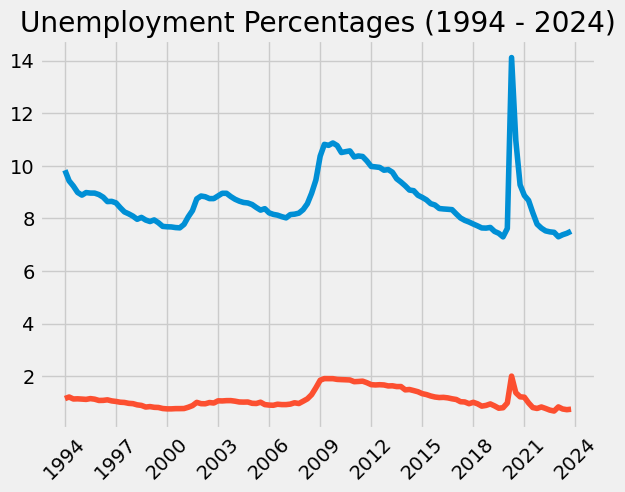

In [17]:
unemployment = unemployment.sort('DATE')

plt.plot(unemployment.column('DATE'), unemployment.column('NEI'), label='NEI')
plt.plot(unemployment.column('DATE'), unemployment.column('PTER'), label='PTER')

# Leave the following code to improve the readability of the horizontal axis tick marks
start_date = min(unemployment.column("DATE"))
end_date = max(unemployment.column("DATE"))
years = [datetime(year, 1, 1) for year in range(start_date.year, end_date.year + 3, 3)]
plt.gca().set_xticks(years)
plt.gca().set_xticklabels([year.strftime('%Y') for year in years])
plt.xticks(rotation=45)
plt.title("Unemployment Percentages (1994 - 2024)")
plt.show()

<!-- END QUESTION -->

### Task 08 📍🔎

<!-- BEGIN QUESTION -->

As you saw early on in the course, sometimes the lines produced from data reveal a story in the data. For this task, we want you to review the graph for patterns, identify 3 major events in US history based on the graph, and hypothesize how the events and the patterns in the unemployment data are related.

In your response:
1. Mention 3 events that occurred between 1994 and 2024.
2. Express how those 3 events show up in the patterns you are observing.
3. Hypothesize how those events are associated with unemployment data.

_Points:_ 2

1. Dot-Com Bubble Burst

Event: Burst of the Dot-Com bubble.
Observation: NEI increase between 2001-2003.
Hypothesis: Economic downturn led to job losses.

2. Great Recession

Event: Global financial crisis.
Observation: NEI rise during 2007-2009.
Hypothesis: Financial turmoil caused layoffs and unemployment.

3. COVID-19 Pandemic

Event: COVID-19 outbreak.
Observation: Sharp NEI increase in 2020.
Hypothesis: Pandemic-induced lockdowns led to job losses and economic disruption.


<!-- END QUESTION -->

## Birth Rates


The CSV file `census.csv` contains census-based population estimates for each state on both July 1, 2022 and July 1, 2023. The data was taken from [the US Census 2020-2023 national totals data set](https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/state/totals/NST-EST2023-ALLDATA.csv). 

Run the following code cell to load that data into a table called `pop`.

In [18]:
pop = Table.read_table('census.csv')
pop

REGION,NAME,2022,2023,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,5073903,5108468,58251,59813,36128,-1
4,Alaska,733276,733406,9266,5581,-3539,-16
4,Arizona,7365684,7431344,78494,70792,57814,144
3,Arkansas,3046404,3067732,35566,36473,22202,33
4,California,39040616,38965193,414120,302704,-187389,550
4,Colorado,5841039,5877610,62498,45099,19167,5
1,Connecticut,3608706,3617176,34957,32842,6248,107
3,Delaware,1019459,1031890,10725,10897,12597,6
3,District of Columbia,670949,678972,7627,5020,5460,-44
3,Florida,22245521,22610726,223578,231181,372870,-62


Here is a brief explanation of the column labels:

* `REGION`: Census Region code
* `NAME`: State name
* `'2022'`: 7/1/2022 resident total population estimate
* `'2023'`" 7/1/2023 resident total population estimate
* `'BIRTHS'`: Births in period 7/1/2022 to 6/30/2023			
* `'DEATHS'`: Deaths in period 7/1/2022 to 6/30/2023
* `'MIGRATION'`: Net migration in period 7/1/2022 to 6/30/2023
* `'OTHER'`: Residual for period 7/1/2022 to 6/30/2023

The last four columns describe the components of the estimated change in population during this time interval. 

**Note:** For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.

### Task 09 📍

Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?


_Points:_ 2

In [19]:
us_birth_rate = sum(pop.column('BIRTHS')) / sum(pop.column('2022'))
us_birth_rate

0.010913086179252468

In [20]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ You have provided a possible value.

### Task 10 📍

Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.


_Points:_ 2

In [21]:
migration_rates = np.abs(pop.column('MIGRATION') / pop.column('2022'))
movers = sum(migration_rates > 0.01)
movers

7

In [22]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ You have provided a possible value.

### Task 11 📍

Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).


_Points:_ 2

In [25]:
pop = pop.with_column('REGION', pop.column('REGION').astype(int))
west_births = sum(pop.where('REGION', are.equal_to(4)).column('BIRTHS'))

west_births

840406

In [26]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ You have provided a possible value.

### Task 12 📍

Assign `less_than_west_births` to the number of states that had a total population in 2023 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.


_Points:_ 2

In [27]:
total_west_births = sum(pop.where('REGION', are.equal_to(4)).column('BIRTHS'))
less_than_west_births = sum(pop.column('2023') < total_west_births)

less_than_west_births

5

In [28]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ You have provided a possible value.

### Task 13 📍

In the next question, you will be creating a visualization to understand the relationship between birth and death rates for the states. The annual death rate for a year-long period in a state is the total number of deaths in that period for that state as a proportion of the population size at the start of the time period for that state.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval among the states?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.


_Points:_ 2

In [29]:
visualization = 2

In [30]:
grader.check("task_13")

task_13 results: All test cases passed!
task_13 - 1 message: ✅ You have provided a possible value.

### Task 14 📍🔎

<!-- BEGIN QUESTION -->

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval among the states. 

It may be helpful to create intermediate variables. In our template, we've introduced the names `birth_rates_2022` and `death_rates_2022` as suggestions. We will not test those names, so you do not need to use them. We will only score the visualization you produce.


_Points:_ 2

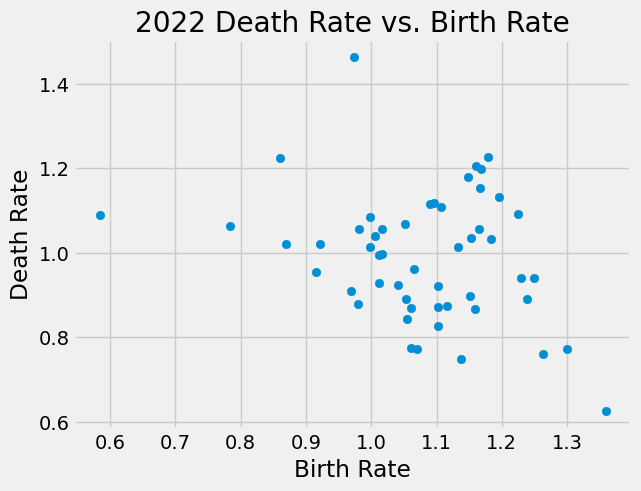

In [33]:
birth_rates_2022 = (pop.column('BIRTHS') / pop.column('2022')) * 100
death_rates_2022 = (pop.column('DEATHS') / pop.column('2022')) * 100

plt.scatter(birth_rates_2022, death_rates_2022)
plt.xlabel('Birth Rate')
plt.ylabel('Death Rate')

# Leave the following code to add a title to your graph
plt.title('2022 Death Rate vs. Birth Rate')
plt.show()

<!-- END QUESTION -->

### Task 15 📍

`True` or `False`: There is an association between birth rate and death rate during this time interval among the states. 

Assign `assoc` to `True` or `False` in the cell below. 


_Points:_ 2

In [31]:
assoc = True

In [34]:
grader.check("task_15")

task_15 results: All test cases passed!
task_15 - 1 message: ✅ You provided a possible answer.

## Marginal Histograms


Consider the following scatter plot: 

<img src="scatter.png" alt="The Scatter plot" width=40%>

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

### Histogram A

<img src="histogram_A.png" alt="Histogram A" width=40%>

### Histogram B

<img src="histogram_B.png" alt="Histogram B" width=40%>

### Task 16 📍

Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to one of the following strings: `'A'`, `'B'`, or `'Neither'`.

_Points:_ 2

In [35]:
histogram_column_x = 'Neither'

In [36]:
grader.check("task_16")

task_16 results: All test cases passed!
task_16 - 1 message: ✅ You provided a possible answer.

### Task 17 📍

Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to one of the following strings: `'A'`, `'B'`, or `'Neither'`.

_Points:_ 2

In [37]:
histogram_column_y = 'B'

In [38]:
grader.check("task_17")

task_17 results: All test cases passed!
task_17 - 1 message: ✅ You provided a possible answer.

## Uber Movement

According to the [Uber Movement page](https://www.uber.com/us/en/community/supporting-cities/data/):
> Planning great cities requires great data. Uber gathers trip data in more than 10,000 cities across the world. So why not share it? Enter Uber Movement, which gives urban planners access to Uber’s aggregated data to help make informed decisions about our cities.

The Uber Movement project and data access have ended, but we still have data from Boston and Manila during. Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the Uber Movement project. The `'sourceid'` and `'dstid'` columns contain codes corresponding to start and end locations of each ride. The `'hod'` column contains codes corresponding to the hour of the day the ride took place. The ride time column contains the length of the ride in minutes.

Run the following code cell to create the table `uber` which contains the available Uber ride data for Boston and Manila.

In [39]:
boston = Table.read_table("boston.csv").with_column('city', ['Boston']*200_000)
manila = Table.read_table("manila.csv").with_column('city', ['Manila']*200_000)
uber = boston.append(manila)
uber

sourceid,dstid,hod,ride time,city
584,33,7,11.866,Boston
1013,1116,13,17.7993,Boston
884,1190,22,19.3488,Boston
211,364,1,1.7235,Boston
218,1189,7,42.5588,Boston
1048,461,7,26.4212,Boston
879,461,11,23.7743,Boston
1047,1002,17,36.3583,Boston
930,856,6,16.6407,Boston
1110,875,22,17.3533,Boston


### Task 18 📍🔎

<!-- BEGIN QUESTION -->

Using the `uber` table, produce an overlaid histogram that visualizes the distributions of all ride times in Boston and Manila. Use the `group='city'` argument with the [`hist` table method](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) to accomplish this. Additionally, use the given bins in `equal_bins` by utilizing the `bins` argument for the `hist` table method.

_Points:_ 2

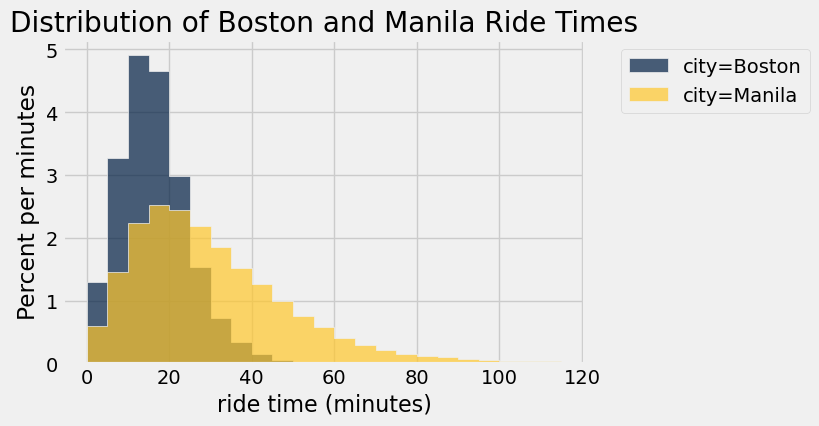

In [40]:
equal_bins = np.arange(0, 120, 5)

uber.hist('ride time', group='city', bins=equal_bins, unit='minutes')

# Leave the following code to add a title to your histogram
plt.title('Distribution of Boston and Manila Ride Times')
plt.show()

<!-- END QUESTION -->

### Task 19 📍🔎

<!-- BEGIN QUESTION -->

Why do you think the distributions for Boston and Manila are different? 

For this task:
* Form a hypothesis that identifies external factors of the two cities that may be causing the difference!
* Provide at least one reference (link) to support your claim.

_Points:_ 2

Hypothesis: Traffic Congestion
The difference in Uber ride time distributions between Boston and Manila may be attributed to higher levels of traffic congestion in Manila due to limited road infrastructure and rapid urban growth.

Reference: https://www.tomtom.com/traffic-index/ranking
According to the TomTom Traffic Index, Manila ranks among the cities with the worst traffic congestion globally. 

<!-- END QUESTION -->

### Task 20 📍🔎

<!-- BEGIN QUESTION -->

From the histograms, it looks like there are more 20 to 40-minute Uber rides in Manila compared to Boston. Histograms reflect density, so be careful of interpreting the heights of the bars as counts. It is okay to compare the histograms directly because they both represent 200,000 data points. For this task, produce a bar chart showing that Manila does have more 20 to 40-minute Uber rides than Boston. 

**Note:** For this task, it doesn't matter if you include 40-minute rides in your count or not.

**Hint:** Consider using the [`group` table method](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.group.html).

_Points:_ 2

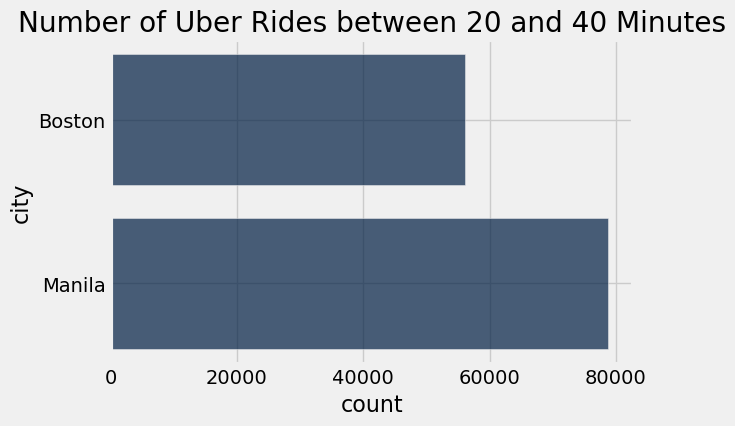

In [41]:
filtered_data = uber.where('ride time', are.between_or_equal_to(20, 40))
grouped_data = filtered_data.group('city')
grouped_data.barh('city', 'count')

...

# Leave the following code to add a title to your histogram
plt.title('Number of Uber Rides between 20 and 40 Minutes')
plt.show()

<!-- END QUESTION -->

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [42]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ It seems that you have assigned the name unemployment to a table.
task_01 - 2 message: ✅ The contents in unemployment seem correct.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ Great work converting all the dates.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ It seems like you have the correct values in by_nei.
task_03 - 2 message: ✅ It seems like you have the correct values in by_nei_pter.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ There are 10 rows (quarters) in your table.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ pter is an array.
task_05 - 2 message: ✅ You didn't seem to subtract the correct arrays in the wrong order.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your table has the correct number of columns.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ You have provided a possible value.

task_10 results